Data from Kaggle

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# daatset api
!kaggle competitions download -c cifar-10

 99% 710M/715M [00:03<00:00, 173MB/s]
100% 715M/715M [00:03<00:00, 208MB/s]


In [5]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


.7z format breakdown

In [7]:
!pip install py7zr

In [8]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [2]:
filenames = os.listdir('/content/train')

In [3]:
len(filenames)

50000

Label for Y

In [5]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [11]:
labels_df.shape

(50000, 2)

In [15]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [12]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [6]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [14]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


Creating X

In [7]:
import os

# List of image filenames
filenames = filenames
directory = '/content/train'

x = []


# Loop through filenames
for fname in filenames:
    x.append(os.path.join(directory, fname))

In [21]:
x[0]

'/content/train/18025.png'

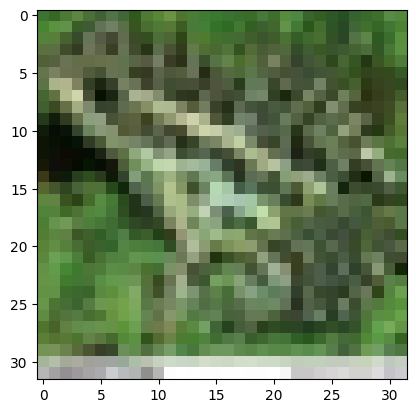

In [22]:
# display dog image
img = mpimg.imread(x[0])
imgplt = plt.imshow(img)
plt.show()

Convert image to numpy using cv2

In [8]:
# Load and convert images to array
import cv2
x_numpy = np.asarray([
    cv2.resize(cv2.imread(file), (32, 32)) for file in x
    if cv2.imread(file) is not None
], dtype=np.float32) / 255.0  # normalize to 0-1

In [26]:
x_numpy.shape

(50000, 32, 32, 3)

In [9]:
X = x_numpy
Y = np.array(labels)
print(X.shape,Y.shape)

(50000, 32, 32, 3) (50000,)


Train Test Split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
X_train[0] # Already scaled

array([[[0.42352942, 0.39215687, 0.42745098],
        [0.41568628, 0.3764706 , 0.40784314],
        [0.28627452, 0.20392157, 0.30588236],
        ...,
        [0.38039216, 0.3882353 , 0.36078432],
        [0.39607844, 0.4117647 , 0.38431373],
        [0.3372549 , 0.3529412 , 0.32941177]],

       [[0.27058825, 0.21176471, 0.25490198],
        [0.29803923, 0.23137255, 0.26666668],
        [0.2627451 , 0.15686275, 0.2627451 ],
        ...,
        [0.32156864, 0.3254902 , 0.2901961 ],
        [0.2901961 , 0.28627452, 0.2509804 ],
        [0.2901961 , 0.28235295, 0.24705882]],

       [[0.25882354, 0.15686275, 0.24313726],
        [0.27450982, 0.18431373, 0.2627451 ],
        [0.25882354, 0.16862746, 0.30980393],
        ...,
        [0.2509804 , 0.18431373, 0.19215687],
        [0.24705882, 0.18431373, 0.1882353 ],
        [0.25490198, 0.20784314, 0.20784314]],

       ...,

       [[0.4       , 0.3137255 , 0.40784314],
        [0.38431373, 0.3019608 , 0.40392157],
        [0.44313726, 0

In [19]:
X_train.shape

(40000, 32, 32, 3)

Building The CNN Model

In [11]:
import tensorflow as tf
from tensorflow import keras

In [21]:
num_of_classes = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
# training the neural network
model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.0975 - loss: 2.3267 - val_acc: 0.0882 - val_loss: 2.3026
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.0954 - loss: 2.3027 - val_acc: 0.1045 - val_loss: 2.3027
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.0969 - loss: 2.3027 - val_acc: 0.0878 - val_loss: 2.3028
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - acc: 0.0979 - loss: 2.3028 - val_acc: 0.1020 - val_loss: 2.3028
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.0965 - loss: 2.3028 - val_acc: 0.0878 - val_loss: 2.3031
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.0996 - loss: 2.3027 - val_acc: 0.1002 - val_loss: 2.3029
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.1005 - loss: 2.3028 - val_acc: 0.1002 - val_loss: 2.3030
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.0997 - loss: 2.3027 - val_acc: 0.1002 - val_loss: 2.3028
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━

## Using ResNet 50 Pretrained Model
- optimizers.RMSprop(lr=2e-5)

In [12]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [13]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [14]:
# Build the model

num_of_classes = 10


model = models.Sequential()
model.add(layers.Input(shape=(32, 32, 3)))              # Input layer
model.add(layers.UpSampling2D((2, 2)))                 # 32 → 64
model.add(layers.UpSampling2D((2, 2)))                 # 64 → 128
model.add(layers.UpSampling2D((2, 2)))                 # 128 → 256
model.add(layers.Resizing(224, 224))                   # Final resize to exact ResNet input
model.add(convolutional_base)                          # ResNet feature extractor
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100352)         │       401,408 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,843,978 (140.55 MB)

 Trainable params: 36,589,770 (139.58 MB)

 Non-trainable params: 254,208 (993.00 KB)

In [15]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=1)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()